#<font color='navy' size=6pt> Supervised Machine Learning: Regression Problems (Continued)

This notebook includes regularized regression methods such as LASSO and Ridge

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##<font color='blue' size=5pt> Real Data Applications with Linear Regression

In the following example we learn how to write a code in Python for determining the line of best fit given one dependent variable and one input feature. That is to say we are going to determine a slope  𝑚  and an intercept  𝑛 , the equation of the best fit line being  𝑦=𝑚𝑥+𝑏.

We are going to analyze a real data set that was extracted from the 1974 Motor Trend US magazine and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973-1974 models).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
cars = pd.read_csv('drive/MyDrive/Data Sets/mtcars.csv')

In [ ]:
cars

**Objective 1**: We want to to know if there is any association between the weight of the car and the mileage.

In [ ]:
cars['mpg'].values

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

In [ ]:
y = cars.mpg.values
x = cars.wt.values

In [ ]:
xb, yb = np.mean(x) , np.mean(y)

In [ ]:
xb

3.21725

##<font color='blue' size=5pt> The Least Squares Method </font>

The main idea is that in 1-D the OLS estimation is equivalence with the calculation of the slope via the Pearson correlation coefficient.

Below we have some important definitions.

## Evaluation of the Errors

### MSE

$$\text{MSE}:=\frac{1}{n}\sum_{i=1}^{n}(y_i-x_i\cdot\vec{\beta})^2$$

here the i-th observation has multiple features:

$$x_i = \left(x_{i1},x_{i2},...x_{ip}\right)$$

where the "dot" product is defined as

$$x_i\cdot\vec{\beta} = \sum_{j=1}^{p} x_{ij}\beta_j$$

### RMSE

Root mean squared error:

$$\text{RMSE}:=\left(\frac{1}{n}\sum_{i=1}^{n}(y_i-x_i\cdot\vec{\beta})^2\right)^{1/2}$$

### MAE

Mean absolute error:

$$\text{MAE}:=\frac{1}{n}\sum_{i=1}^{n}\left|y_i-x_i\cdot\vec{\beta}\right|$$

In [ ]:
data = np.column_stack([x,y])

In [ ]:
# this is a much simpler format of gradient descent if we only had one input feature and one intercept
def compute_cost(m,b):
    SSE = 0

    # number of datapoints in training data
    N = float(len(data))

    # Compute sum of squared errors
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        SSE += (y - (m * x + b)) ** 2

    # Return average of squared error
    return SSE/(2*N)

In [ ]:
compute_cost(-1,10)

101.65119796874998

In [ ]:
b_range = np.linspace(-100,100,num=4000)
m_range = np.linspace(-100,100,num=4000)
M, B = np.meshgrid(m_range, b_range)
Z = np.log(compute_cost(M, B))

In [ ]:
Z.shape

(4000, 4000)

In [ ]:
# here we learn where in the grid we have optimal values for m and b
b,m = np.where(Z==np.min(Z))
print(m_range[m][0])
print(b_range[b][0])

-5.326331582895719
37.234308577144304


In [ ]:
compute_cost(-5.326331582895719,37.234308577144304)

4.348961319523508

In [ ]:
print('The intercept is '+str(b_range[b][0]),' and the slope is '+str(m_range[m][0]))

The intercept is 37.234308577144304  and the slope is -5.326331582895719


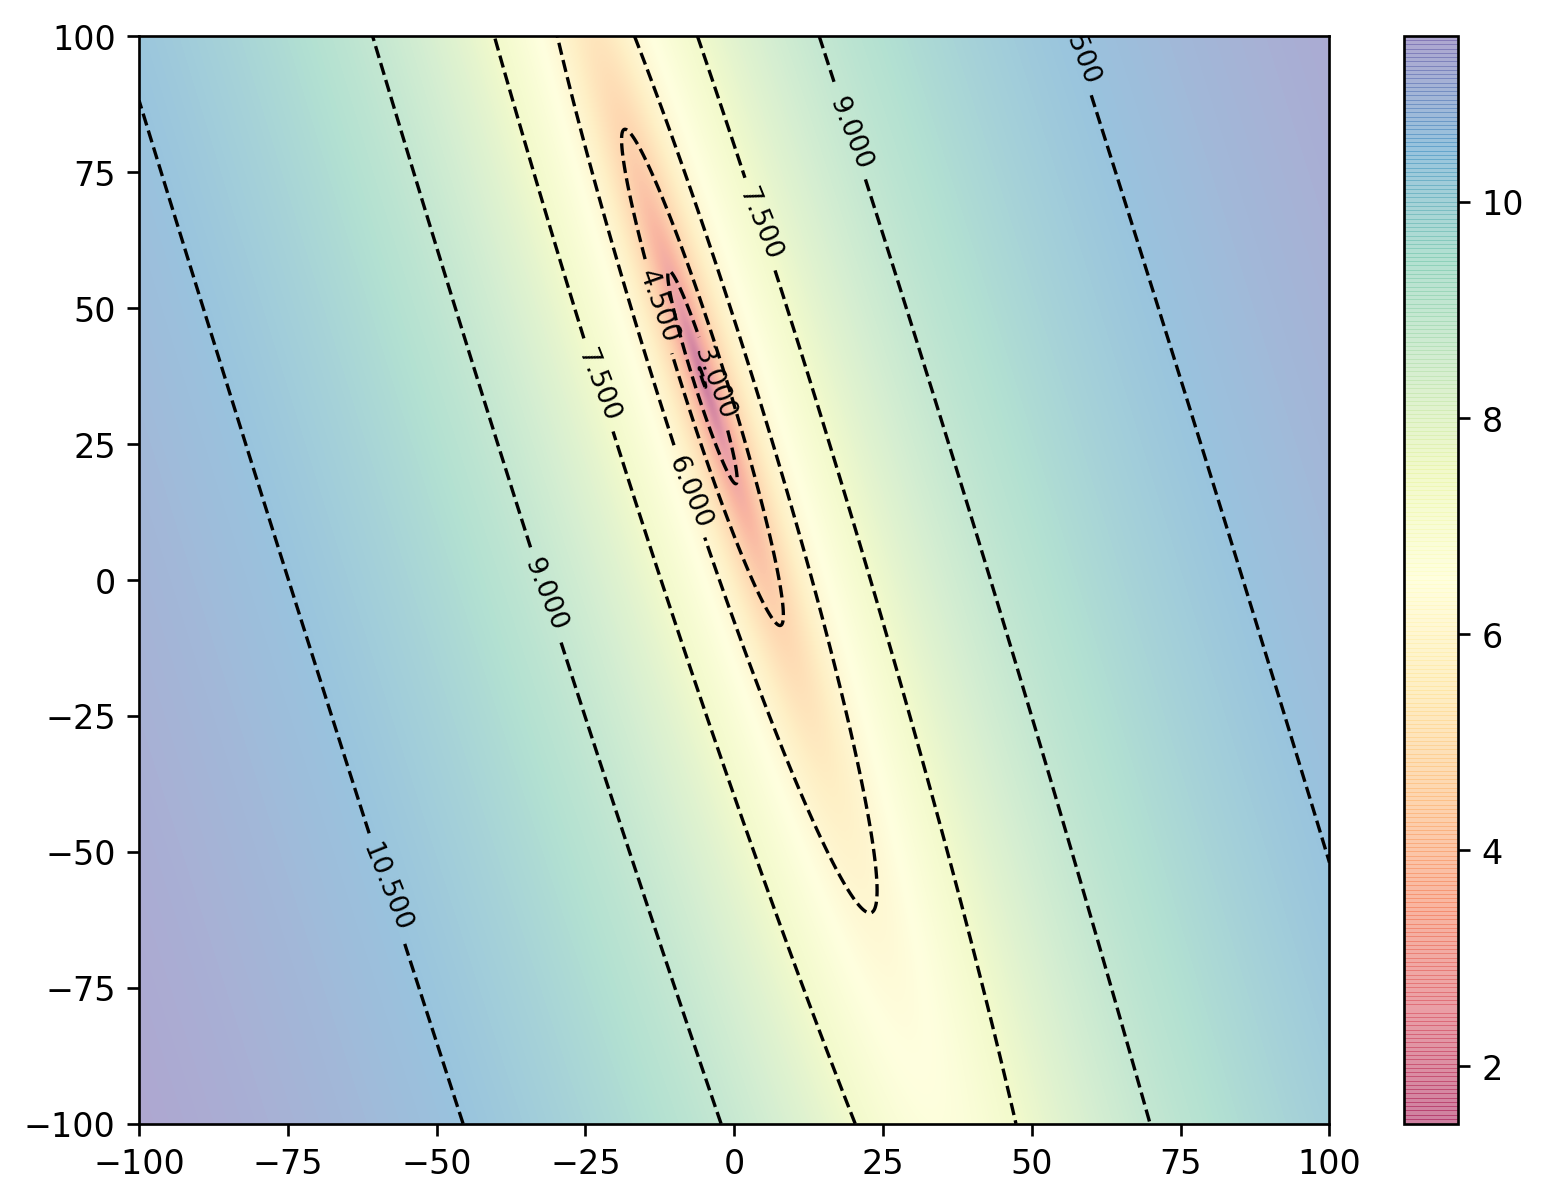

In [ ]:
plt.figure(figsize=(8,6))
contours = plt.contour(M,B,Z,colors='black', linestyles='dashed', linewidths=1)
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[-100, 100, -100, 100], origin='lower',
           cmap='Spectral', alpha=0.5,aspect='auto', interpolation='bicubic')
plt.colorbar()
plt.show()

In [ ]:
# what is the shape of x?
x.shape

(32,)

In [ ]:
model = LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression()

In [ ]:
m= model.coef_
b=model.intercept_ # this is what the machine has learned

In [ ]:
w = np.column_stack([x,y])

In [ ]:
r = np.corrcoef(np.transpose(w))[0,1]

In [ ]:
m = r*np.std(y)/np.std(x)

In [ ]:
m

-5.344471572722676

In [ ]:
x_range = np.linspace(np.min(x)-0.25,np.max(x)+0.25,2)
yhat = model.predict(x_range.reshape(-1,1))

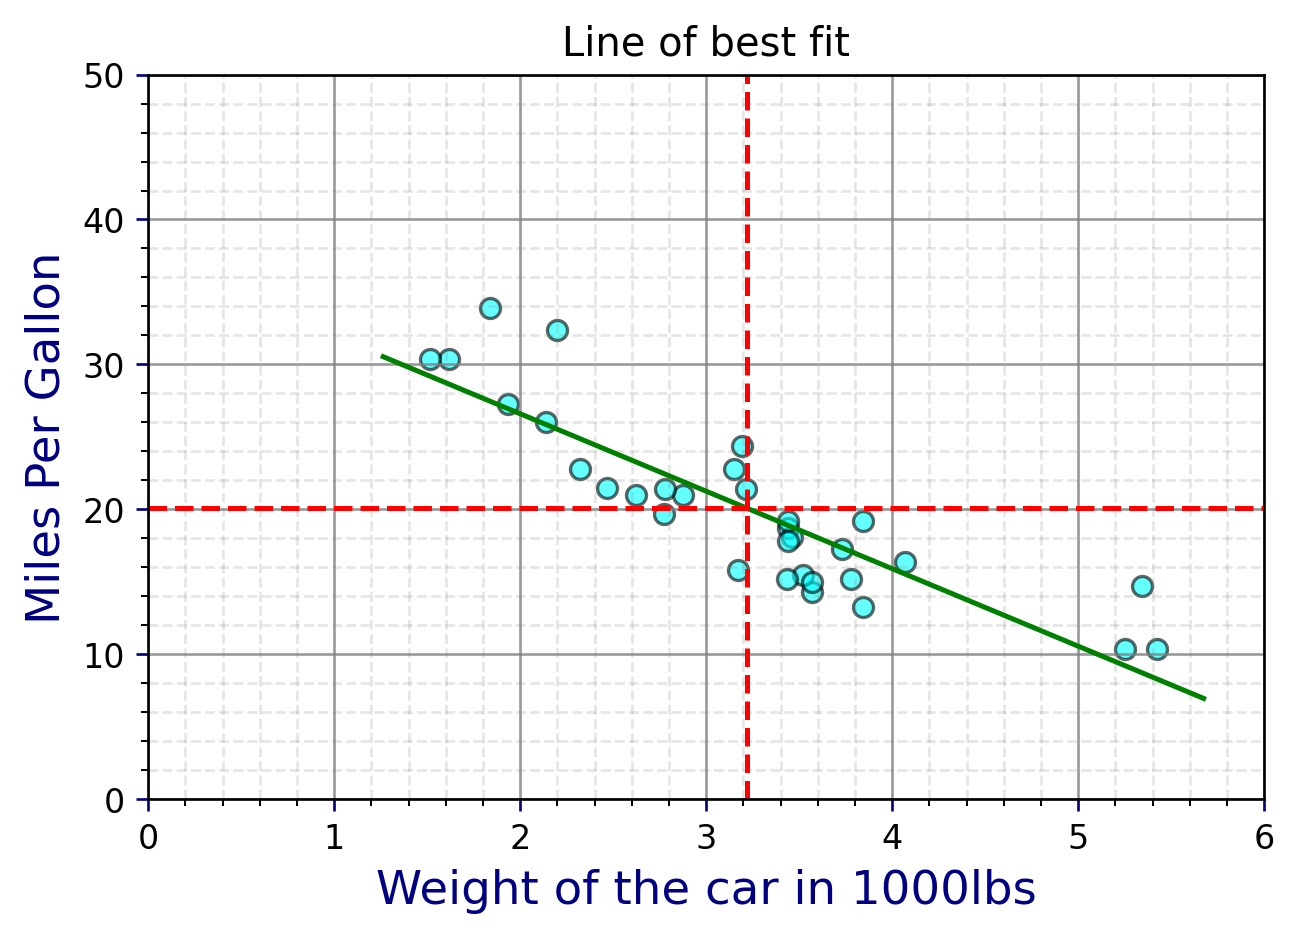

In [ ]:
#Plot dataset
plt.scatter(x, y,ec='k',color='cyan',alpha=0.6)
#Predict y values
pred = m * x_range + b
#Plot predictions as line of best fit
plt.plot(x_range, pred, c='g')
plt.xlim(0, 6)
plt.ylim(0, 50)
plt.xlabel('Weight of the car in 1000lbs',fontsize=14,color='navy')
plt.ylabel('Miles Per Gallon',fontsize=14,color='navy')
plt.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
plt.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.axvline(x=xb, color='red',linestyle='dashed')
plt.axhline(y=yb, color='red',linestyle='dashed')
plt.tick_params(axis='x', color='navy')
plt.tick_params(axis='y', color='navy')
plt.minorticks_on()
plt.title('Line of best fit')
plt.show()

##<font color='red' size=6pt> Diagnostics for Regression
### <font color='blue' size=5pt> The Coefficient of Determination

$$\large R^2:=1-\frac{\sum (residual_i)^2}{\sum(y_i-\bar{y})^2}$$

We know we make a good job when R2 is very close to 1. We make a very poor job if R2 is close to 0 or even negative.

In [ ]:
model.score(x.reshape(-1,1),y)

0.7528327936582646

In [ ]:
r**2

0.7528327936582647

###<font color='blue' size=5pt>Test the Residuals for Goodness of fit</font>

We investigate the distribution of the residuals, plot a histogram and apply a normality test

In [ ]:
residuals = y - model.predict(x.reshape(-1,1))

In [ ]:
import seaborn as sns

# import uniform distribution
from scipy import stats
from scipy.stats import norm

<ipython-input-65-a27d5bf613ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(residuals,


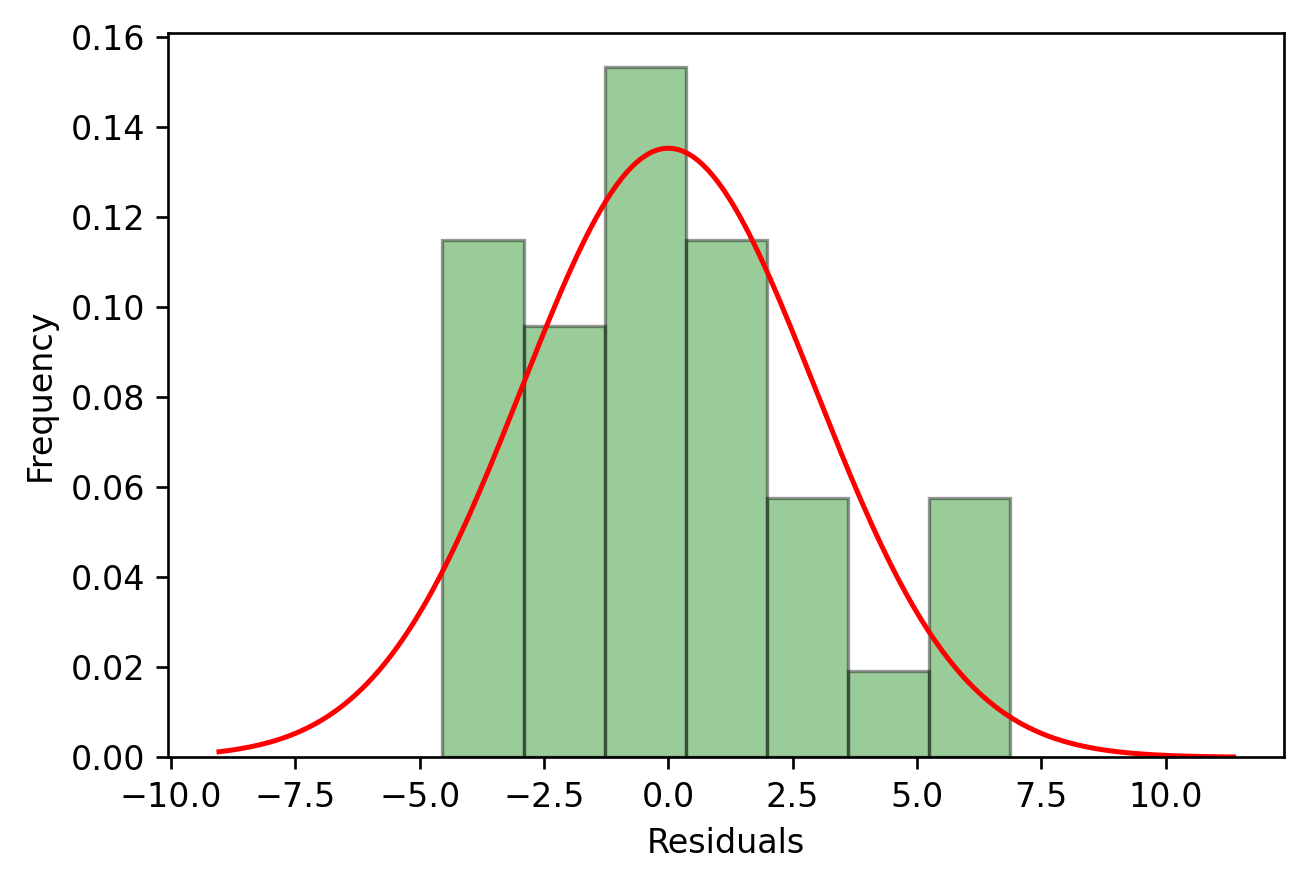

In [ ]:
# this is how to present a distributional plot
ax1 = sns.distplot(residuals,

                  bins=7,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'green','ec':'black'},
                  fit=stats.norm,
                  fit_kws={"color":'red'})
ax1.set(xlabel='Residuals', ylabel='Frequency')
plt.show()

### Message: We cannot tell very clearly that the histogram resembles a normal distribution. We can also consider a Q-Q Plot:

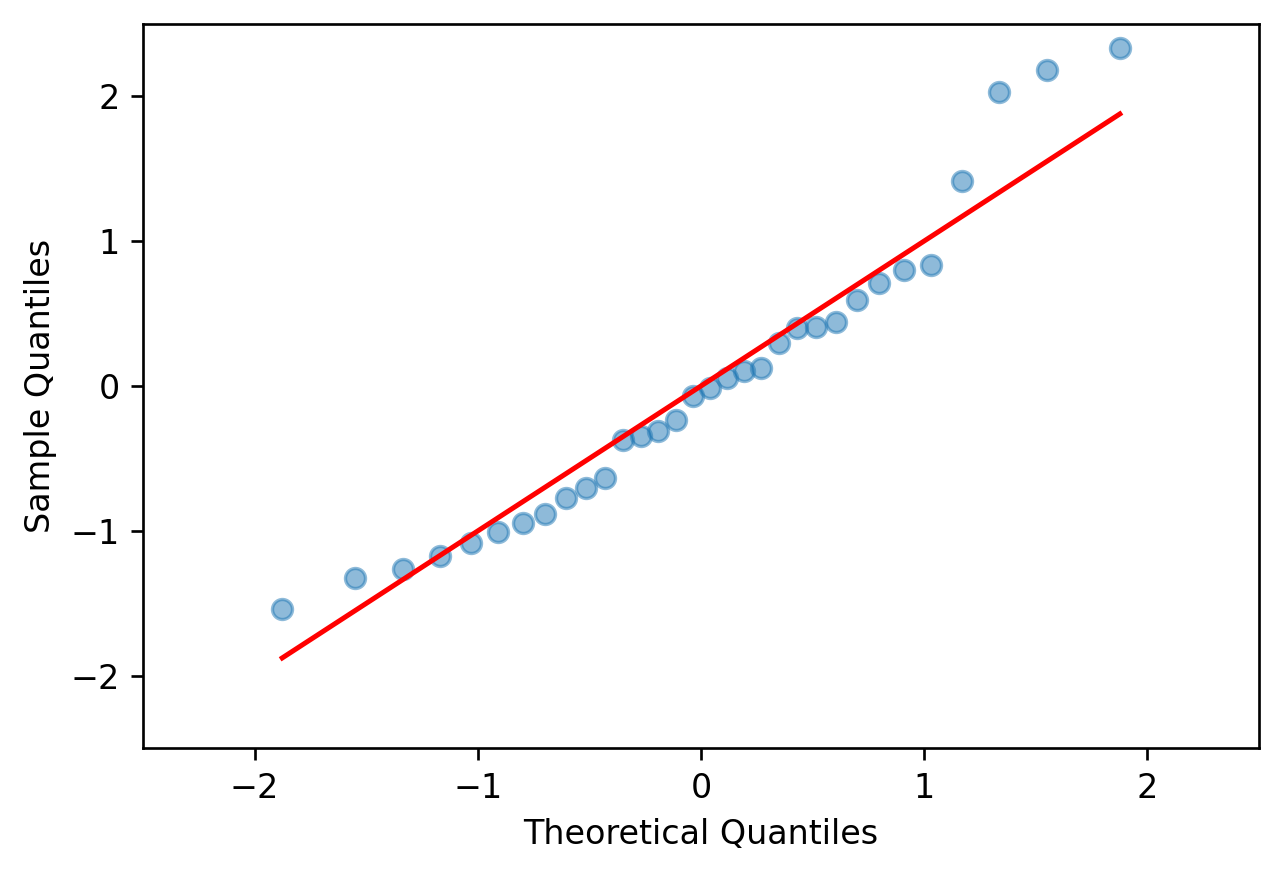

In [ ]:
import statsmodels.api as sm
sm.qqplot(residuals/np.std(residuals), loc = 0, scale = 1, line='s',alpha=0.5)
plt.xlim([-2.5,2.5])
plt.ylim([-2.5,2.5])
#plt.axes().set_aspect('equal')
#plt.grid(which='major', color ='grey', linestyle='-', alpha=0.5)
#plt.grid(which='minor', color ='grey', linestyle='--', alpha=0.15)
#plt.minorticks_on()
plt.show()

### Test Statistic for the Kolmogorov-Smirnov test is:

$$\sup |EDF(x) - CDF(x)|$$

Here $$EDF(x)$$ means the emprirical distribution function:

$$EDF(x):= \frac{1}{n}\sum \mathbb{1}(t)_{t<x}$$

we add $1$ for each $t$ less than $x$.

ALso, $CDF$ stands for the cummulative distribution function:

$$CDF(x):= \int_{-\infty}^{x}f(t)dt$$ where $f$ is the probability density function.

If the p-value is high (much greater then 5%) so we do not reject the null hypethesis which means that the normality assumption is not violated.

In [ ]:
dist = getattr(stats, 'norm')
params = dist.fit(residuals)

In [ ]:
stats.kstest(scale.fit_transform(residuals.reshape(-1,1)).ravel(),'norm')

KstestResult(statistic=0.08217402470387336, pvalue=0.9698176646662029, statistic_location=-0.6384943195632952, statistic_sign=1)

In [ ]:
stats.kstest(residuals,'norm',params)

KstestResult(statistic=0.08217402470387336, pvalue=0.9698176646662029, statistic_location=-1.8830236224503238, statistic_sign=1)

In [ ]:
#@title
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              79.58
Date:                Thu, 06 Oct 2022   Prob (F-statistic):                    4.55e-10
Time:                        14:33:02   Log-Likelihood:                         -122.40
No. Observations:                  32   AIC:                                      246.8
Df Residuals:                      31   BIC:                                      248.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## <font color='blue'>Multiple Linear Regression (Linear models with more features)</font>

An example of a linear model with two features is $\hat{y}_i = 1+3x_{i1}+5x_{i2}.$

In this example the value $1$ is referred to as the *intercept*.


If $p$ features in the data and we want to create a linear model, the *input-output* mechanism is

$$
\underbrace{Y}_\text{Output}  = \underbrace{\beta_1X_1+\beta_2X_2+\beta_3X_3+...+\beta_pX_p}_\text{Linear combination of the features}
$$

This could represented as a matrix-vector product:

$$
\underbrace{Y}_\text{Output}  = \underbrace{X\cdot \beta}_\text{Linear combination of the columns of matrix X}
$$

In this model the features are $X_1, X_2, ...X_p$ and $\beta_1, \beta_2,...\beta_p$ are a set of weights (real numbers).

## <font color='blue'> Vector Spaces </font>

| **Axiom**                                                                                                                                | **Meaning**                                                                                                                                                                                                  |
| ---------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| [Associativity](https://en.wikipedia.org/wiki/Associativity "Associativity") of vector addition                                          | **u** + (**v** + **w**) = (**u** + **v**) + **w**                                                                                                                                                            |
| [Commutativity](https://en.wikipedia.org/wiki/Commutativity "Commutativity") of vector addition                                          | **u** + **v** = **v** + **u**                                                                                                                                                                                |
| [Identity element](https://en.wikipedia.org/wiki/Identity_element "Identity element") of vector addition                                 | There exists an element **0**∈ _V_, called the _[zero vector](https://en.wikipedia.org/wiki/Zero_vector "Zero vector")_, such that **v** + **0** = **v** for all **v**∈ _V_.                                 |
| [Inverse elements](https://en.wikipedia.org/wiki/Inverse_element "Inverse element") of vector addition                                   | For every **v**∈ _V_, there exists an element −**v** ∈ _V_, called the _[additive inverse](https://en.wikipedia.org/wiki/Additive_inverse "Additive inverse")_ of **v**, such that **v** + (−**v**) = **0**. |
| Compatibility of scalar multiplication with field multiplication                                                                         | _a_(_b_**v**) = (_ab_)**v**<sup>[\[nb 3\]](https://en.wikipedia.org/wiki/Vector_space#cite_note-4)</sup>                                                                                                     |
| Identity element of scalar multiplication                                                                                                | 1**v** = **v**, where 1 denotes the [multiplicative identity](https://en.wikipedia.org/wiki/Multiplicative_identity "Multiplicative identity") in _F_.                                                       |
| [Distributivity](https://en.wikipedia.org/wiki/Distributivity "Distributivity") of scalar multiplication with respect to vector addition | _a_(**u** + **v**) = _a_**u** + _a_**v**                                                                                                                                                                     |
| Distributivity of scalar multiplication with respect to field addition                                                                   | (_a_ + _b_)**v** = _a_**v** + _b_**v**                                                                                                                                                                       |


## <font color='blue'>Linear vs Non-linear models</font>

This is a linear model in terms of the weights $\beta$:


$$\large
\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 - \beta_3x_3
$$

An example for what linear in weights means
<font color='forestgreen'>
$$
\hat{y}(2\beta+3\alpha) = 2\hat{y}(\beta)+3\hat{y}(\alpha)
$$</font>

The following is a non-linear model in terms of the weights:


$$\large
\hat{y} = \beta_0 + \beta_1^3x_1 + \frac{1}{\beta_2+\beta_3}x_2 - e^{\beta_3}x_3
$$

<font color='magenta'>
$$
\hat{y}(2\beta+3\alpha) \neq 2\hat{y}(\beta)+3\hat{y}(\alpha)
$$</font>

The main point of linear regression is to assume that predictions can ben made by using a linear combination of the features.

For example, if the data from each j-th feature is
$$\begin{bmatrix}
x_{1j} \\
x_{2j} \\
\vdots \\
x_{nj}
\end{bmatrix}$$,
 <!-- \begin{bmatrix}
           x_{12} \\
           x_{22} \\
           \vdots \\
           x_{n2}
         \end{bmatrix}, ...
         \begin{bmatrix}
           x_{1p} \\
           x_{2p} \\
           \vdots \\
           x_{np}
         \end{bmatrix}$$ -->
and we assume that the depdendent variable is predicted by a linear combination of these columns populated with features' data. Each column represents a feature and each row an independent observation.

The predicted value is denoted by $\hat{y}$ and


$$
\hat{y} = \beta_1\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
         +
         \beta_2\begin{bmatrix}
           x_{11} \\
           x_{21} \\
           \vdots \\
           x_{n1}
         \end{bmatrix}
                  + ...
         \beta_p\begin{bmatrix}
           x_{1p} \\
           x_{2p} \\
           \vdots \\
           x_{np}
         \end{bmatrix}
$$

### We have a vector of weights:

$$
\beta = \begin{bmatrix}
           \beta_{1} \\
           \beta_{2} \\
           \vdots \\
           \beta_{p}
         \end{bmatrix}
$$

### <font color="forestgreen">
Critical thinking: what exactly is $\hat{y}$?
</font>

<font color='magenta'> The matrix-vector product between the feaures and the weights
$$
\hat{y} = X\cdot\beta
$$
</font>

The main idea is that

$$
\hat{y}= \begin{bmatrix}
           \hat{y}_{1} \\
            \hat{y}_{2}  \\
           \vdots \\
             \hat{y}_{n}
         \end{bmatrix}
$$

represents the predictions we make by training (or as we say in ML *learning*) the weights $\beta.$

Training means running an optimization algorithm and determining the values of the weights that minimize an objective function.

### <font color='darkgreen'> We want to *learn* the weights $\beta_1,\beta_2,...\beta_p$ that minimize the sum of the squared residuals:

$$\large
\sum\limits_{i=1}^{n}\left(y_i-\sum\limits_{j=1}^{p}X_{i,j}\cdot\beta_j\right)^2
 = \sum\limits_{i=1}^{n}\left(y_i-X_{i,1}\beta_1-X_{i,2}\beta_2 - ...X_{i,p}\beta_p\right)^2 $$
</font>

### <font color='red'> How do we know we are on the right track after we perform the minimization of the square residuals? <font>

In [ ]:
from sklearn.preprocessing import StandardScaler
# here we scale the input features
scale = StandardScaler()

In [ ]:
Xscaled = scale.fit_transform(x)

In [ ]:
model.fit(Xscaled,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(Xscaled,y)

0.8548224115848233

In [ ]:
residuals = y - model.predict(Xscaled)

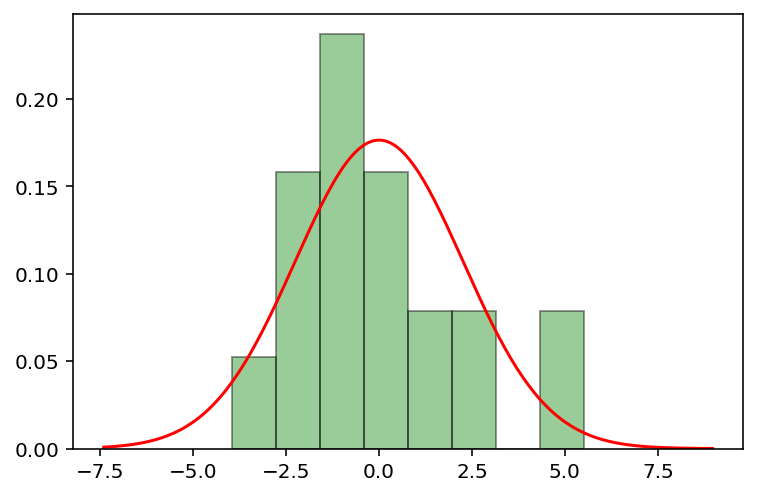

In [ ]:
sns.distplot(residuals,
                  bins=8,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'green','ec':'black'},
                  fit=stats.norm,
                  fit_kws={"color":'red'})
plt.show()

In [ ]:
dist = getattr(stats, 'norm')
params = dist.fit(residuals)

In [ ]:
# here we apply the Kolmogorov-Smirnov test
stats.kstest(residuals, stats.norm.cdf)

KstestResult(statistic=0.2806005461790241, pvalue=0.010127264926770031)

In [ ]:
stats.kstest(residuals, stats.norm.cdf)

KstestResult(statistic=0.28060054617902364, pvalue=0.010127264926770201)

## When Multiple Linear Regression Fails

Plain *vanilla* multiple linear regression (OLS) fails if the number of observations is smaller than the number of features.


Example: If the dependent variable is the Sales Price, we cannot uniquely determine the weights for the features if we have only 4 observations.


    Dist to School     Property Area       Housing Area         Value       Property Tax     Bathrooms   Sales Price   
------------------  ----------------      -------------      --------      -------------   -----------  ------------
              7.0               0.4               1800           234                9.8            2.0         267.5
              2.3               0.8               1980           244               10.5            2.5         278.2
              4.3               1.1               2120           252               16.2            3.0         284.5
              3.8               0.6               2500           280               18.4            3.5         310.4
              

In [ ]:
c

In [ ]:
df1

,Dist. to School,Prop. Area,Housing Area,Value,Prop. Tax,Bathrooms,Sales Price
0,7.0,0.4,1800,234,9.8,2.0,267.5
1,2.3,0.8,1980,244,10.5,2.5,278.2
2,4.3,1.1,2120,252,16.2,3.0,284.5
3,3.8,0.6,2500,280,18.4,3.5,310.4


In [ ]:
Xf = df1.values
X = Xf[:,:-1]
y = Xf[:,-1]

In [ ]:
X

array([[7.00e+00, 4.00e-01, 1.80e+03, 2.34e+02, 9.80e+00, 2.00e+00],
       [2.30e+00, 8.00e-01, 1.98e+03, 2.44e+02, 1.05e+01, 2.50e+00],
       [4.30e+00, 1.10e+00, 2.12e+03, 2.52e+02, 1.62e+01, 3.00e+00],
       [3.80e+00, 6.00e-01, 2.50e+03, 2.80e+02, 1.84e+01, 3.50e+00]])

In [ ]:
X.shape

(4, 6)

In [ ]:
np.transpose(X)

array([[7.00e+00, 2.30e+00, 4.30e+00, 3.80e+00],
       [4.00e-01, 8.00e-01, 1.10e+00, 6.00e-01],
       [1.80e+03, 1.98e+03, 2.12e+03, 2.50e+03],
       [2.34e+02, 2.44e+02, 2.52e+02, 2.80e+02],
       [9.80e+00, 1.05e+01, 1.62e+01, 1.84e+01],
       [2.00e+00, 2.50e+00, 3.00e+00, 3.50e+00]])

In [ ]:
M = np.transpose(X).dot(X) # this is how we compute the object X^T*X

In [ ]:
M

array([[8.72200e+01, 1.16500e+01, 3.57700e+04, 4.34680e+03, 2.32330e+02,
        4.59500e+01],
       [1.16500e+01, 2.37000e+00, 6.13600e+03, 7.34000e+02, 4.11800e+01,
        8.20000e+00],
       [3.57700e+04, 6.13600e+03, 1.79048e+07, 2.13856e+06, 1.18774e+05,
        2.36600e+04],
       [4.34680e+03, 7.34000e+02, 2.13856e+06, 2.56196e+05, 1.40896e+04,
        2.81400e+03],
       [2.32330e+02, 4.11800e+01, 1.18774e+05, 1.40896e+04, 8.07290e+02,
        1.58850e+02],
       [4.59500e+01, 8.20000e+00, 2.36600e+04, 2.81400e+03, 1.58850e+02,
        3.15000e+01]])

In [ ]:
np.linalg.det(M) # this show that M is NOT invertible!!

0.0

In [ ]:
np.linalg.det(M+0.000001*np.eye(len(M)))

0.6134753533848759

In [ ]:
np.linalg.inv(M+0.0001*np.eye(len(M))).dot(M)

array([[ 9.61854858e-01, -1.75933510e-01, -1.06314781e-03,
         8.36576045e-03,  4.24339557e-02, -6.20522817e-02],
       [-1.75933511e-01,  7.48903637e-02, -5.73345534e-03,
         4.27898670e-02,  1.88499974e-01,  3.05122126e-02],
       [-1.06221967e-03, -5.73309866e-03,  9.99964276e-01,
         2.63929889e-04,  1.12862665e-03,  6.02998033e-04],
       [ 8.36587051e-03,  4.27899073e-02,  2.63963068e-04,
         9.98009046e-01, -9.03963543e-03,  1.86103684e-03],
       [ 4.24339621e-02,  1.88499976e-01,  1.12870602e-03,
        -9.03962599e-03,  9.52312434e-01,  8.93285243e-02],
       [-6.20522807e-02,  3.05122129e-02,  6.02881672e-04,
         1.86102090e-03,  8.93285233e-02,  1.29324989e-02]])

In [ ]:
# we can apply the Moore-Penrose pseudo-inverse
beta = np.linalg.inv(M+0.001*np.eye(len(M))).dot(np.transpose(X).dot(y))

In [ ]:
beta

array([-0.71851108,  0.27602504, -0.04422342,  1.48978604,  0.33049367,
        0.0863962 ])

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

In [ ]:
model = Ridge(alpha=0.001,fit_intercept=False)
model.fit(X,y)
model.coef_

array([-0.71851109,  0.27602501, -0.04422342,  1.48978604,  0.33049367,
        0.0863962 ])

$$\large M\cdot \vec{\beta} = \beta_1*col_1(M)+\beta_2*col_2(M)+...\beta_p*col_p(M)$$

### Message: if the determinant of X^T * X is zero then we have a rank deficient situation and multiple regression via OLS is NOT working !!!!!

In [ ]:
lm = LinearRegression()
model1 = lm.fit(X,y)

In [ ]:
model1.coef_ # these coefficients are "fake news"

array([ 0.05403601, -0.08762454,  0.03884158,  0.43500068, -0.46942783,
       -0.04774555])

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y, X,)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 24 Mar 2023   Prob (F-statistic):                nan
Time:                        18:07:54   Log-Likelihood:                 102.26
No. Observations:                   4   AIC:                            -196.5
Df Residuals:                       0   BIC:                            -199.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7187        inf         -0        n

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1765: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.9/dist-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [ ]:
# here we compute the determinant of X^t *X and show it is 0
np.linalg.det(np.transpose(X).dot(X))

0.0

## <font color= 'blue'> What does Rank Deficiency means and why we need Regularization</font>

The assumption for multiple linear regression is

$$\large
Y = X\beta + \sigma \epsilon
$$

where $\sigma$ is the standard deviatin of the noise. Further, we assume that the "noise" $\epsilon$ is independent and identically distributed with a zero mean.

We believe that the output is a linear combination of the input features.

Thus, if we would like to solve for the "weights" $\beta$ we may consider

$$\large
X^tY = X^tX\beta+\sigma X^t\epsilon
$$

And if the matrix $X^tX$ is invertible then we can solve for expected value of $\beta$:

$$\large
\mathbb{E}(\beta) = (X^tX)^{-1}X^t Y
$$

We can show by using *Linear Algebra* that the OLS solution obtained form minimizing the sum of the square residuals is equivalent.

###<font color='green'> We can test whether the matrix $X^tX$ is invertible by simply computing its determinant and checking that it is not zero.

###<font color='crimson'> IMPORTANT: When the matrix $X^tX$ is not invertible we cannot apply this method to get $\mathbb{E}(\beta)$. In this case if we minimize the sum of the squared residuals the algorithm cannot find just *one* best solution.</font>


## <font color='blue'>A solution for rank defficient Multiple Linear Regression: Regularization</font>

###<font color='violet'> Main Idea: minimize the sum of the square residuals plus a constraint on the vector of weights</font>
The Ridge model (also known as the *Tikhonov regularization*) consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \sum\limits_{j=1}^{p}\beta_j^2$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to

$$
 \sum\limits_{j=1}^{p}\beta_j^2 < M
$$

## <font color= 'navy'> L2 Regularization </font>

The L2 norm is

$$
\|\beta\|_2:=\left(\sum_{j=1}^{p}\beta_j^2\right)^{1/2}
$$

The Ridge model (also known as the *Tikhonov regularization*) consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \sum\limits_{j=1}^{p}\beta_j^2$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

The hyperparameter $\alpha$ is becoming a "tunning" parameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to

$$
 \sum\limits_{j=1}^{p}\beta_j^2 < M
$$

## <font color= 'navy'> L1 Regularization -> LASSO regularization</font>

The L1 norm is

$$
\|\beta\|_1:=\sum_{j=1}^{p}|\beta_j|
$$

The Lasso model  consists of *learning* the weights by the following optimization:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha \|\beta\|_1$$

where $alpha$ is a constant that can be adjusted based on a feedback loop so it is a hyperparameter.

This optimization is equivalent to minimizing the sum of the square residuals with a constraint on the sum of the squared weights

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2$$

subject to

$$
 \sum\limits_{j=1}^{p}|\beta_j| < M
$$

## <font color='navy'> The difference between L1 and L2 norms </font>

In the following example the L2 norm of the vector $\vec{AB}$ is 5 and the L1 norm is $4+3=7$.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1IIy5df8JcgHcI8oWxJbze9PiW_cUaIZD'
width='550px' />
<figcaption>The difference between the L1 and L2 norms</figcaption></center>
</figure>


##<font color='navy'> Geometric comparison in 2D between L1 and L2 norms

<figure>
<center>
<img src='https://drive.google.com/uc?id=13uBQRlI_-LNfA8yLphY3fHChoEbjqOEW'
width='500px' />
<figcaption>Difference between L1 and L2</figcaption></center>
</figure>


##<font color= 'navy'> Elastic Net Regularization </font>

Tha main idea is to combine the L2 and L1 regularizations in a *weighted* way, such as:

$$
\lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + 0.5\cdot (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2
$$

Here $0\leq\lambda\leq1$ is called the L1_ratio.

The Elstic Net regularization consists of *learning* the weights by solving the following optimization problem:

$$\text{minimize} \frac{1}{n}\sum_{i=1}^{n}\left(\text{Residual}_i\right)^2 + \alpha\left( \lambda\cdot \sum\limits_{j=1}^{p}|\beta_j| + 0.5\cdot (1-\lambda)\cdot\sum\limits_{j=1}^{p}\beta_j^2\right)$$

So with this rgularization approach we have two hyperparameters that we need to decide on.

In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset, i.e. https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
# we get the input and the output as numerical arrays
y = df['Concrete compressive strength(MPa, megapascals) '].values
#X = df.loc[ : , df.columns != 'strength'].values

In [ ]:
data = pd.read_csv('drive/MyDrive/Data Sets/AirI.csv', header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,3.4482,0.001314,0.157470,0.688300,0.152920,0.000000,0.00000,0.096603,0.52135,0.382050,...,-2.94590,0.219960,-0.69045,0.240440,-0.258640,1.33870,0.114820,-0.43046,0.82309,1.543500
1,3.3019,0.188490,0.553190,0.258290,0.000031,0.000000,0.00000,0.039008,0.43211,0.527160,...,-0.22680,-0.428570,0.74992,-0.111920,1.583000,0.88565,-0.053227,0.67796,-1.72010,-0.550510
2,2.2894,0.052169,0.438520,0.494030,0.015282,0.000000,0.00000,0.000000,0.00000,0.394840,...,1.15790,0.010118,0.73593,1.356000,0.057821,-1.44140,1.581800,1.25420,1.02540,-1.018900
3,2.6207,0.000000,0.000000,0.004213,0.109340,0.493440,0.39300,0.000000,0.00000,0.578540,...,-0.69767,1.577800,0.54899,-0.780420,1.136700,-0.84240,0.993120,-0.44576,-0.78778,-1.490900
4,2.8439,0.000000,0.000000,0.019504,0.260470,0.549860,0.17016,0.010568,0.30520,0.670460,...,-1.49170,-0.688640,-0.69924,0.360740,-0.685860,-0.76161,-0.354560,0.83093,-0.27100,0.388610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2.4101,0.301000,0.021904,0.000415,0.000000,0.000000,0.00000,0.000000,0.00000,0.051206,...,-1.56660,-1.097100,2.77450,0.679850,-0.292200,0.13691,-0.439250,-1.56390,0.29082,0.023485
107,3.1072,0.000734,0.138890,0.688740,0.171630,0.000000,0.00000,0.171260,0.54746,0.280340,...,-0.32440,-1.341500,-1.51650,0.870840,1.023700,0.26581,0.174520,-0.29601,1.13600,0.217580
108,2.4101,0.001095,0.151180,0.688720,0.159000,0.000000,0.00000,0.000000,0.00000,0.194760,...,-0.49572,-0.832130,0.52386,0.189400,1.115700,-0.14259,-0.481300,-1.58790,-0.23976,1.717000
109,2.6207,0.117370,0.526200,0.354590,0.001831,0.000000,0.00000,0.039008,0.43211,0.527160,...,-0.87353,0.063740,0.20128,0.090828,0.338310,-1.23960,-1.197600,-0.35008,0.59517,0.803430


In [ ]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [ ]:
X.shape

(111, 511)

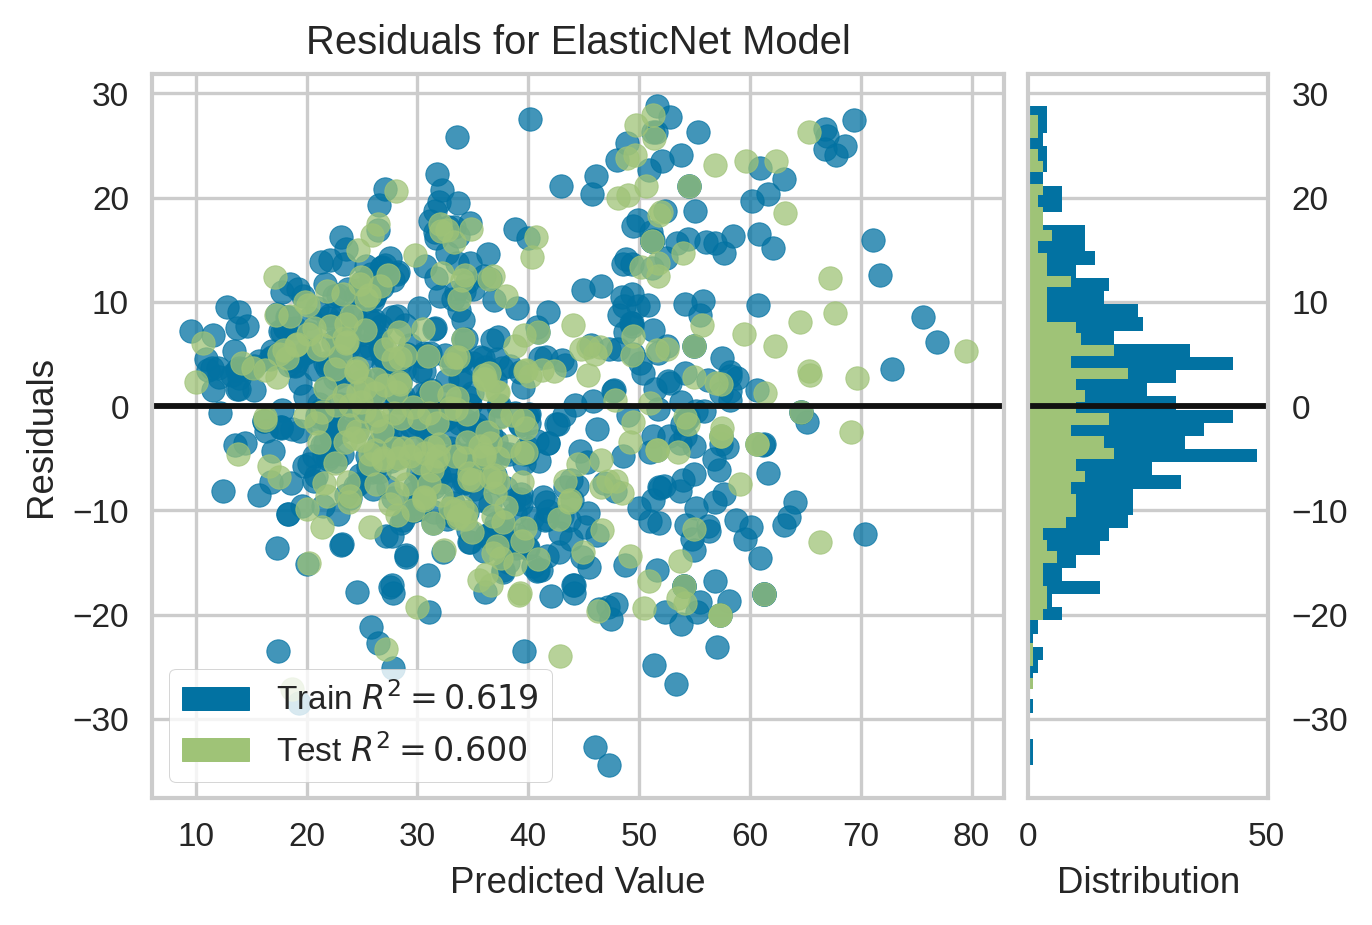

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
from sklearn.model_selection import train_test_split

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Instantiate the linear model and visualizer
model = ElasticNet(alpha=0.01)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

In [ ]:
df.head(10)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [ ]:
import seaborn as sns
sns.set(color_codes=True)

# import uniform distribution
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse

In [ ]:
kf = KFold(n_splits=10,shuffle=True,random_state=123)
scale = StandardScaler()

In [ ]:
pe = []
for alpha in np.arange(0.001,2.001,0.001):
  for idxtrain, idxtest in kf.split(X):
    mse_test = []
    xtrain = X[idxtrain]
    xtest = X[idxtest]
    xtrain = scale.fit_transform(xtrain)
    xtest = scale.transform(xtest)
    ytrain = y[idxtrain]
    ytest = y[idxtest]
    model = Ridge(alpha=0.01)
    model.fit(xtrain,ytrain)
    mse_test.append(mse(ytest,model.predict(xtest)))
  pe.append(np.mean(mse_test))

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Residuals')]

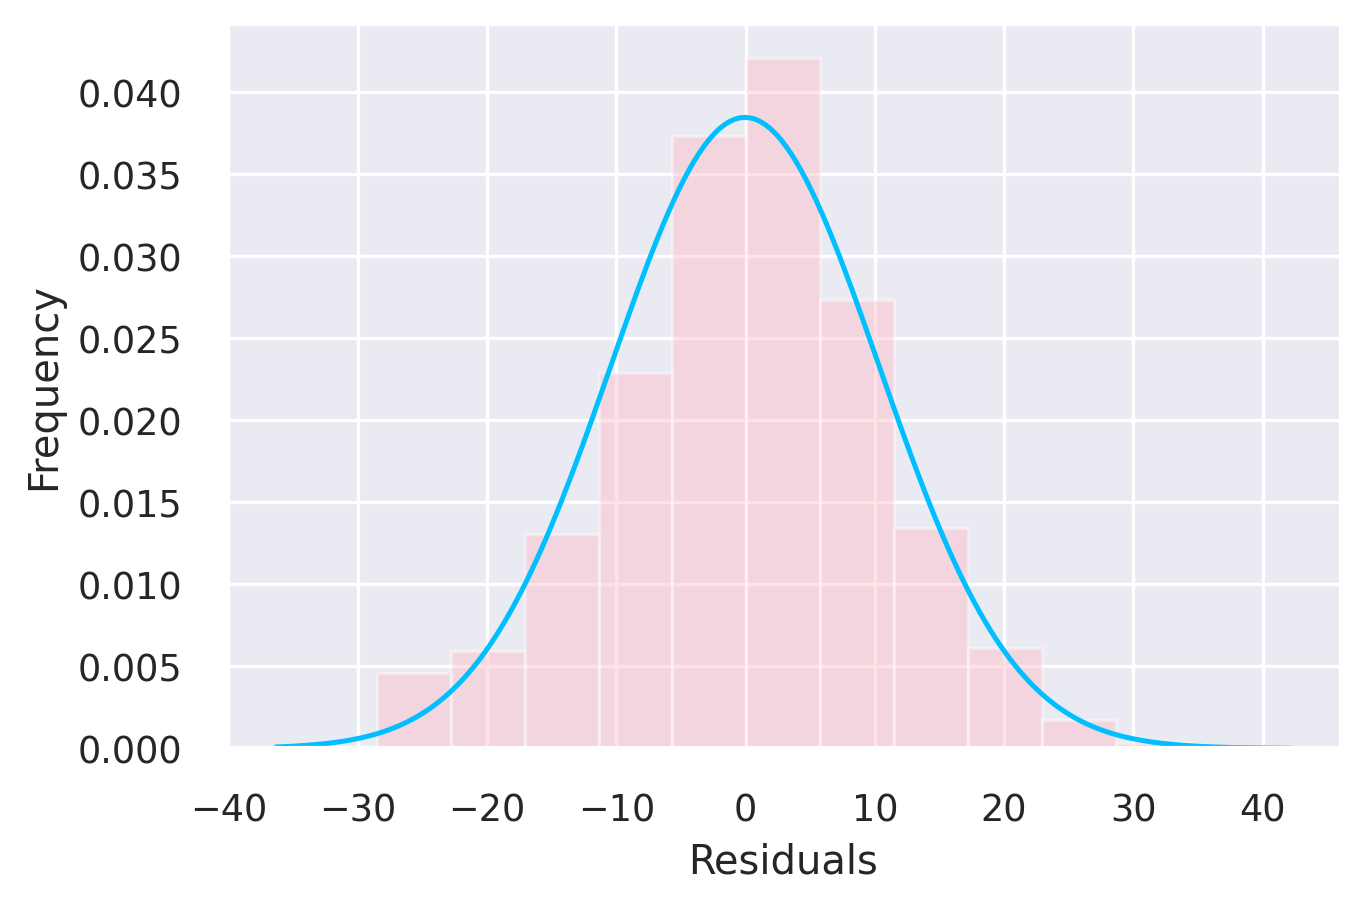

In [ ]:
ax1 = sns.distplot(residuals,

                  bins=11,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax1.set(xlabel='Residuals', ylabel='Frequency')

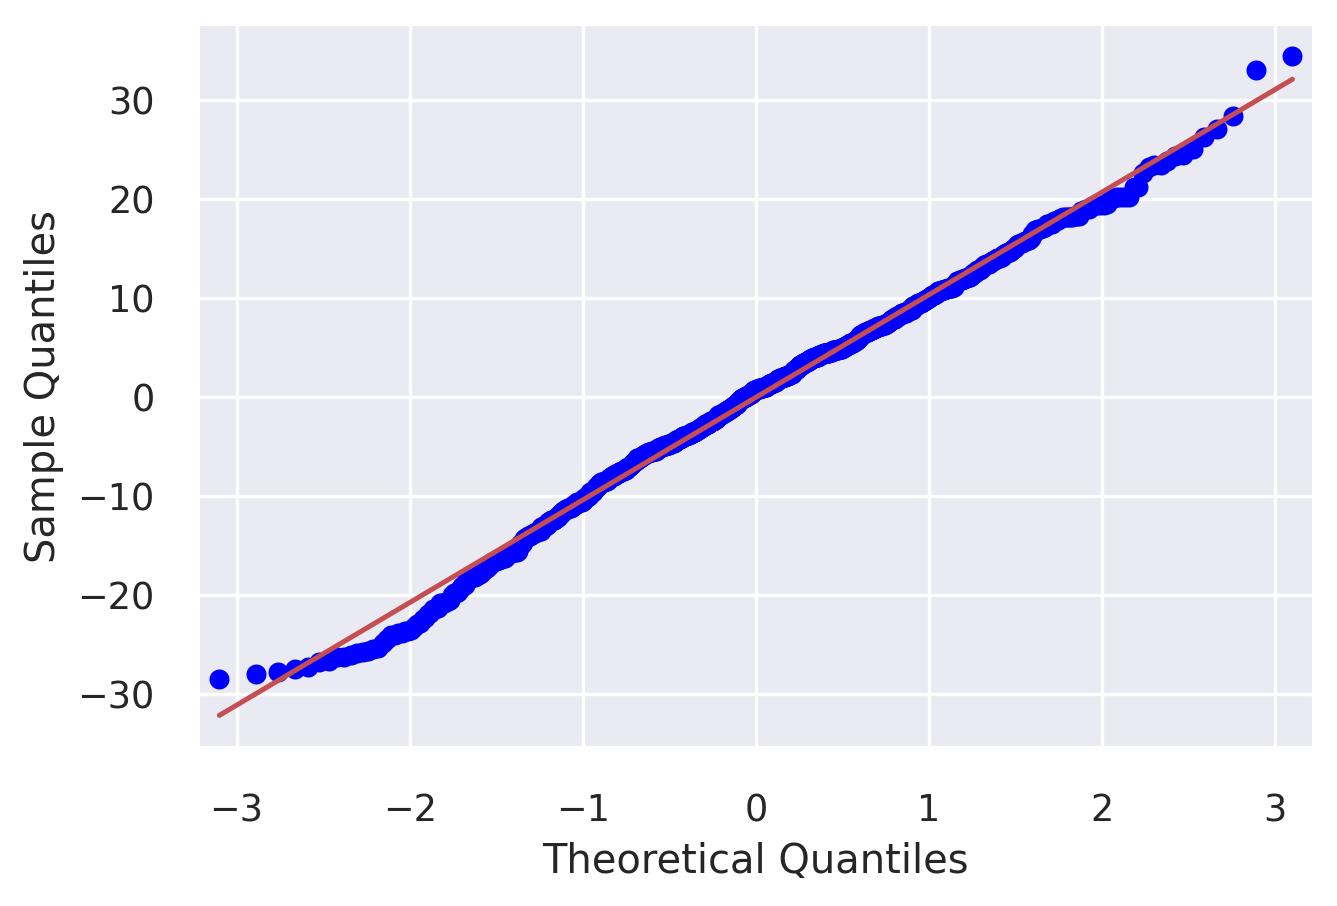

In [ ]:
import pylab
import statsmodels.api as sm
sm.qqplot(residuals, loc = 0, scale = 1, line='s')
pylab.show()

## <font color='blue'> Polynomial Regression</font>

<font color='slateblue'> Main idea: Linear combination of different powers of the feature values.

$$\large
P(x):= \beta_px^p+\beta_{p-1}x^{p-1}+...+\beta_1x+\beta_0
$$

IMPORTANT: P(x) is nonlinear in x. However if x is fixed (x is your data) and $\beta$ is the input we have
$$\large
L(\beta):= \beta_px^p+\beta_{p-1}x^{p-1}+...+\beta_1x+\beta_0
$$

is linear in $\beta$


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## Example

$$\large p(x) = \frac{1}{4}x^3-\frac{3}{2}x^2+x$$

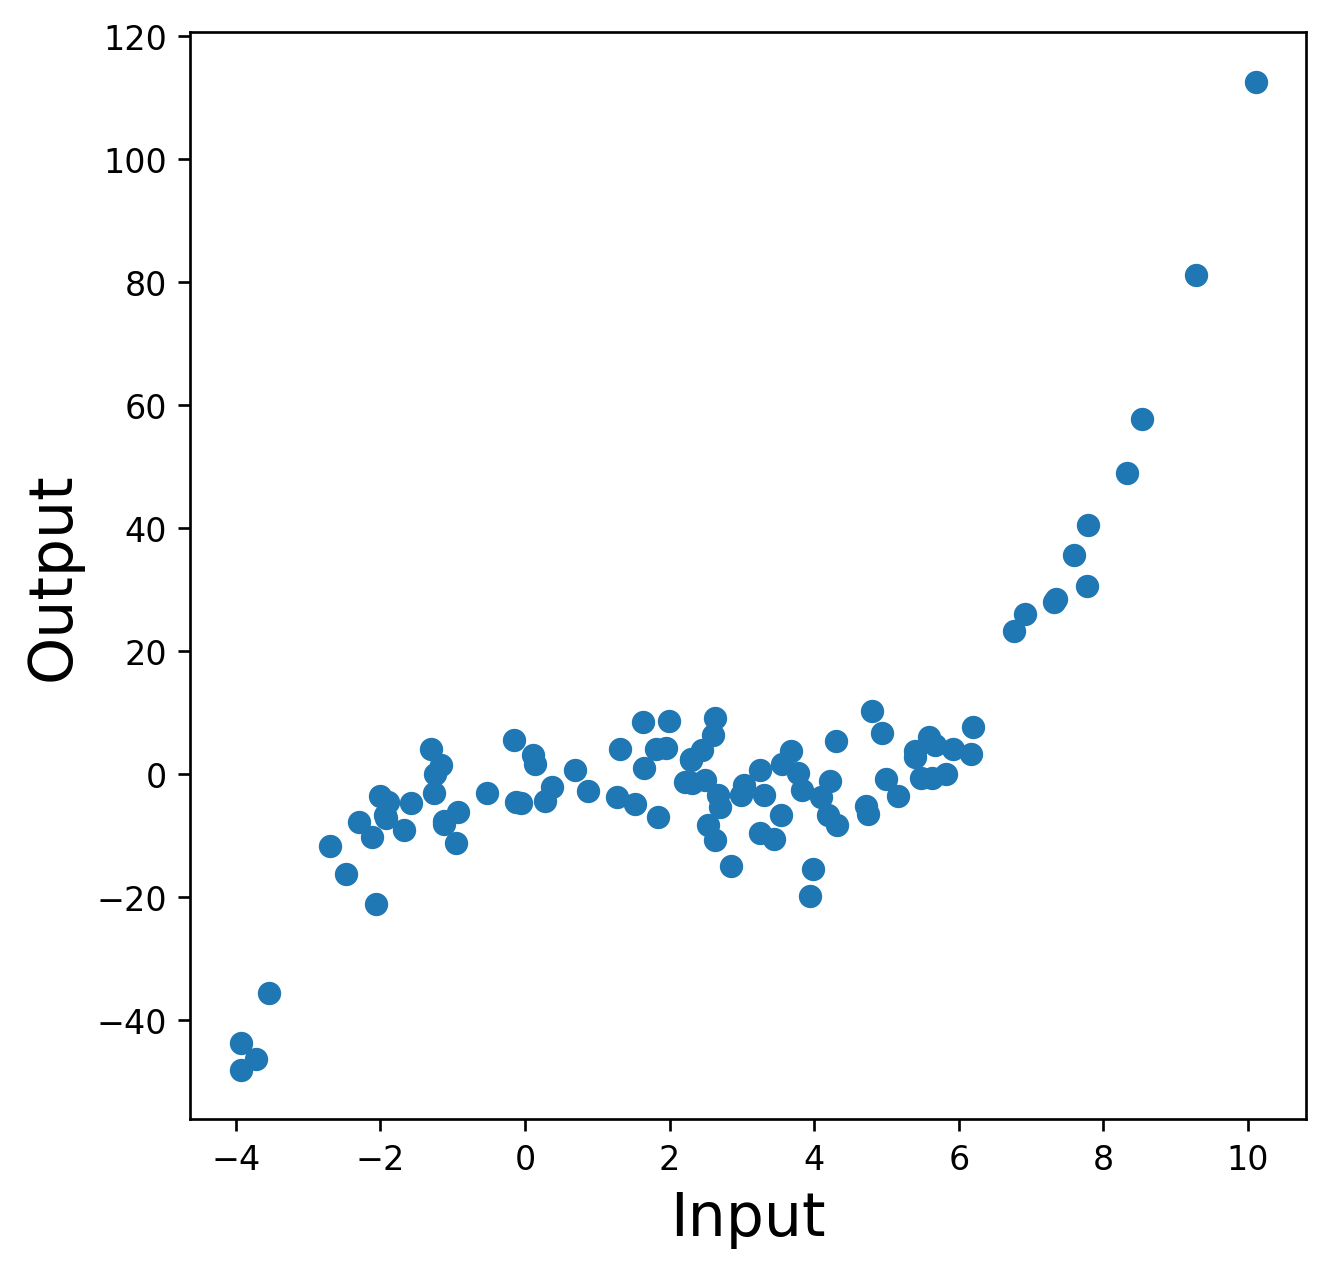

In [ ]:
np.random.seed(1693)
x = 2 - 3 * np.random.normal(0, 1, 100) # this means non-equally spaced values
y = x - 1.5 * (x ** 2) + 0.25 * (x ** 3) + 5*np.random.normal(loc=0,scale=1,size=100) # we generate a cubic relationship between x and y
plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.xlabel('Input',fontsize=18)
plt.ylabel('Output',fontsize=18)
plt.show()

### <font color='fuchsia'> Is a straight line a good idea for capturing the aspect?

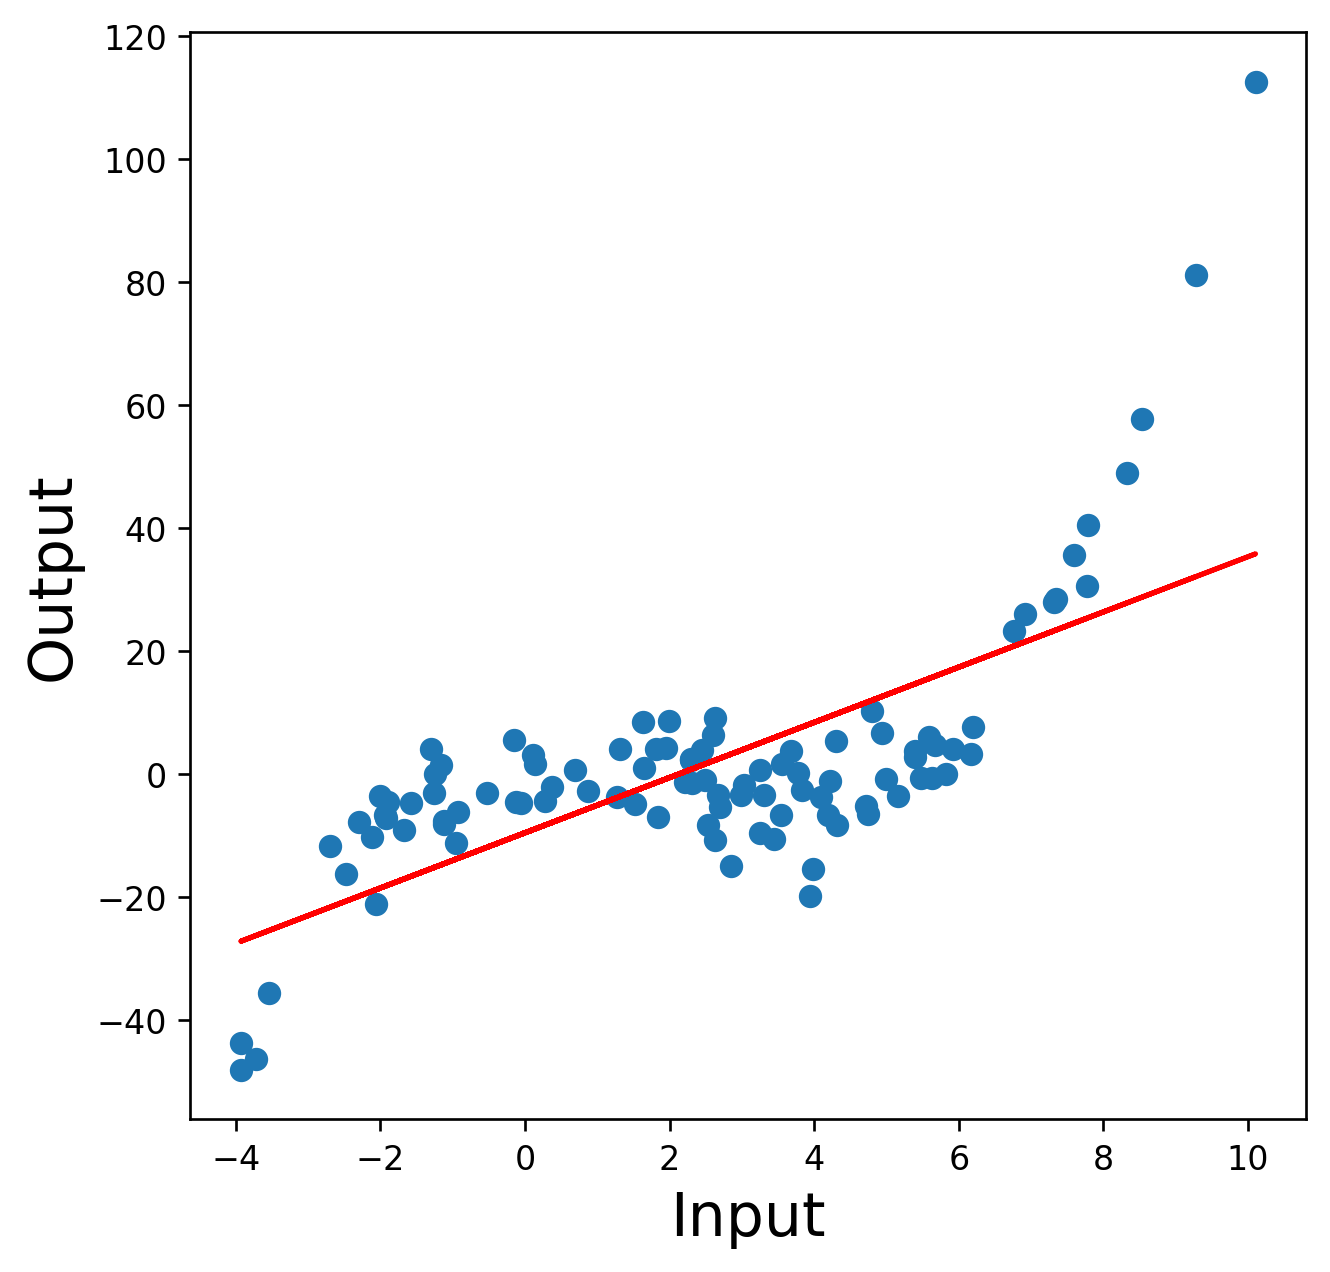

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

model = lm.fit(x.reshape((-1,1)),y)
y_pred = lm.predict(x.reshape((-1,1)))
plt.figure(figsize=(6,6))
plt.scatter(x, y)
plt.plot(x, y_pred, '-',color='r')
plt.xlabel('Input',fontsize=18)
plt.ylabel('Output',fontsize=18)
plt.show()

In [1]:
import operator
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
np.random.seed(1693)
x = 2 - 3 * np.random.normal(0, 1, 100)

def f(x):
    sz = len(x)
    return x - 1.5 * (x ** 2) + 0.25 * (x ** 3) + 5 * np.random.normal(loc=0, scale=1, size=sz)

y = f(x)

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x.reshape((-1,1)))

# the model created is linear in weights
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

fig, ax = plt.subplots()
plt.figure(figsize=(6,6))
ax.scatter(x, y, s=30)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
ax.plot(x, y_poly_pred, color='r',linestyle='--',lw=2)
ax.set_xlabel('Input',fontsize=18)
ax.set_ylabel('Response',fontsize=18)
ax.grid(which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(which='minor', color ='grey', linestyle='--', alpha=0.2)
ax.minorticks_on()
plt.show()

NameError: ignored

In [ ]:
model.coef_

array([ 0.        ,  1.26204772, -1.59419899,  0.25857094])

In [ ]:
pd.DataFrame(x_poly)

,0,1,2,3,4
0,1.0,4.741352,22.480420,106.587590,505.369302
1,1.0,3.554897,12.637292,44.924268,159.701140
2,1.0,0.105749,0.011183,0.001183,0.000125
3,1.0,1.626725,2.646233,4.304692,7.002549
4,1.0,3.252754,10.580411,34.415480,111.945106
...,...,...,...,...,...
95,1.0,-1.257303,1.580812,-1.987560,2.498966
96,1.0,3.685663,13.584110,50.066446,184.528032
97,1.0,3.253514,10.585350,34.439581,112.049645
98,1.0,-3.928013,15.429287,-60.606442,238.062900


##<font color='blue'> Non-Linear that is not exactly a polynomial: A noisy sine wave</font>

In [ ]:
x = np.linspace(0,3.14,50)
epsilon = np.random.normal(scale=0.2,size=x.shape)
y = np.sin(4*x) + epsilon

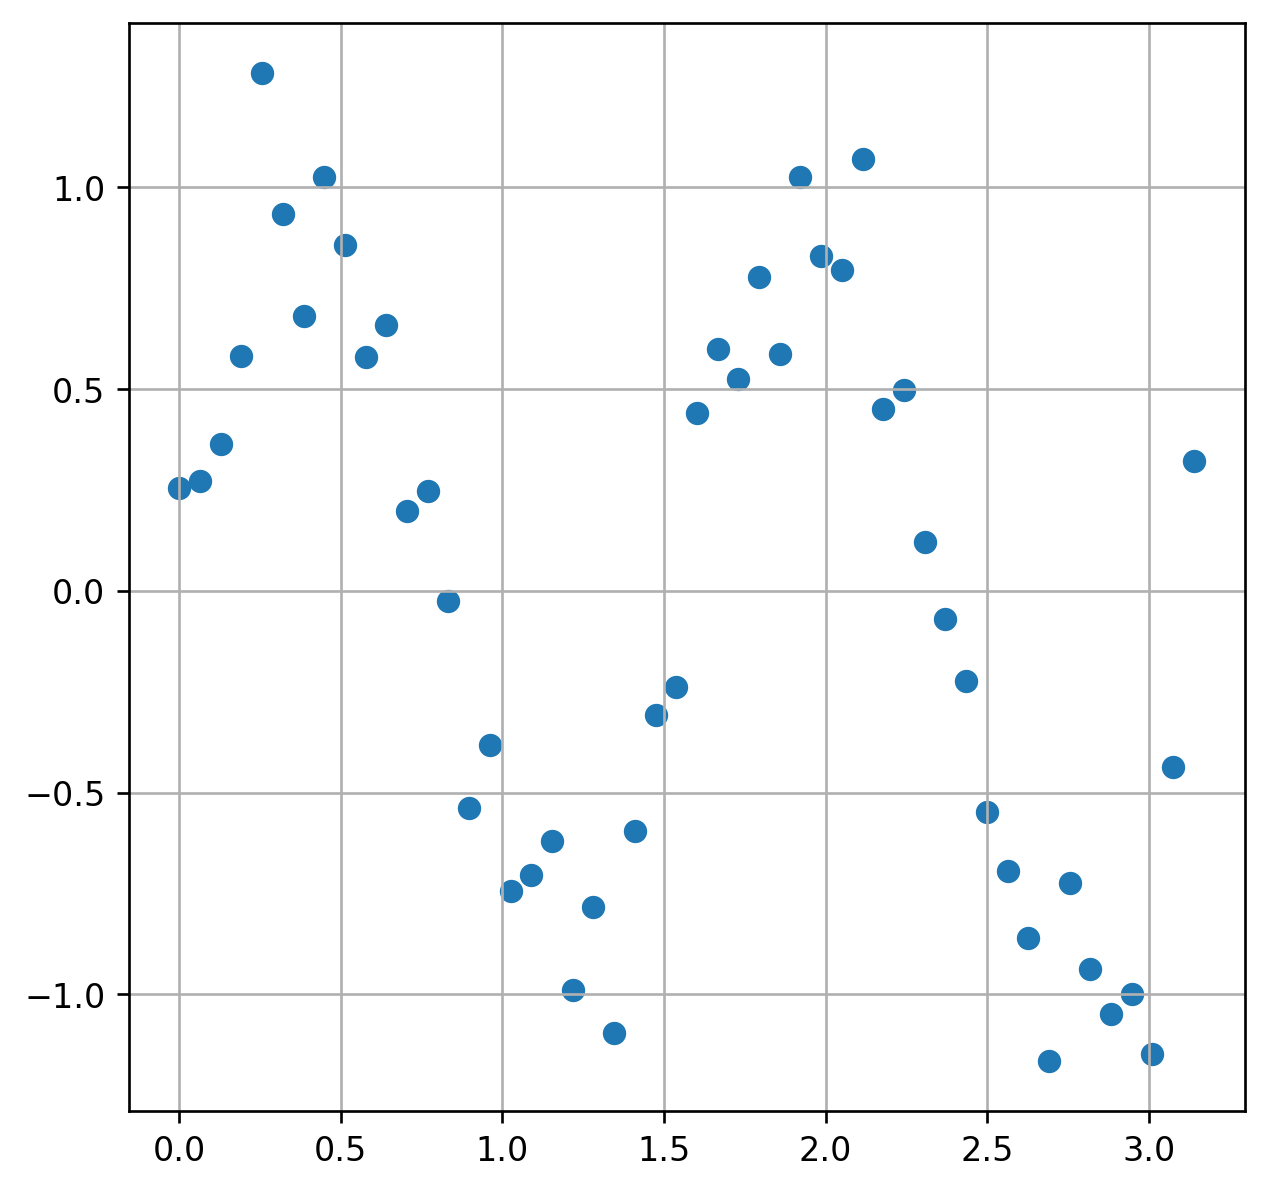

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.grid(True)

In [ ]:
polynomial_features= PolynomialFeatures(degree=6)
x_poly = polynomial_features.fit_transform(x.reshape(-1,1))

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
#print(rmse)
print(r2)

0.8682951727629472


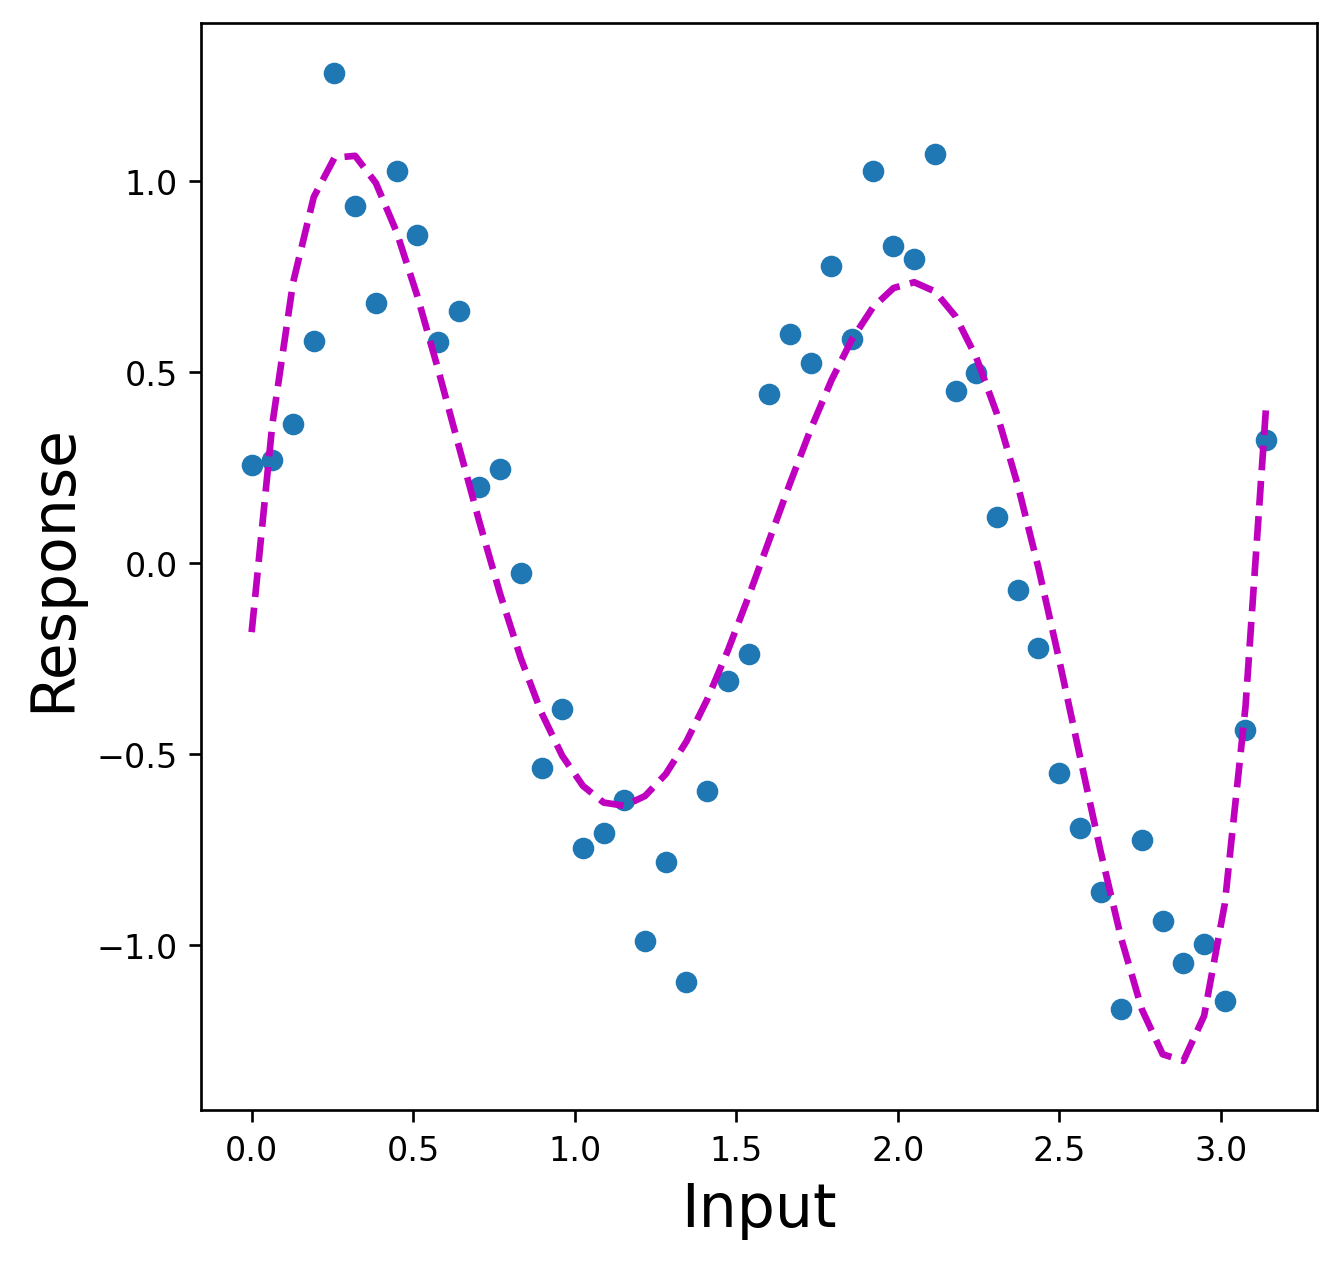

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=30)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m',linestyle='--',lw=2)
plt.xlabel('Input',fontsize=18)
plt.ylabel('Response',fontsize=18)
plt.show()

## <font color='blue'> How do we know we are on the right track?

  - Use Train and Test Sets
  - Use Regularization.
  - Compute (R)MSE on the test set.
  - Compute the coefficient of determination on the test set.
  - Determine the normality of the residuals by using a test statistic (such as Shapiro-Wilk or Kolmogorov-Smirnov), density plots and *quantile-quantile* plots.


##<font color= 'blue'> Model Validation via k-Fold Cross-Validations</font>

In order to compare the predictive power of different models we use K-fold cross-validation.

Example schematic of 5-fold cross-validation:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1AMSDtgJ-ADYjWFbHCdumvIGqUsmKSzdW'
width='550px' />
<figcaption>Step 1 in the 5-fold cross-validation</figcaption></center>
</figure>



In [ ]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=5, random_state=1234,shuffle=True) # Define the split - into n_splits=.. folds
#kf.get_n_splits(df) # returns the number of splitting iterations in the cross-validator


In [ ]:
kf.split(X)

<generator object _BaseKFold.split at 0x7fdd59c08ad0>

In [ ]:
# Example of polynomial regression for the Concrete Strength data

In [ ]:
# question do we have to standardize the data?
# Absolutely yes!

Polynomial features mean all nonlinear interactions between features values i, j, and k such as:

$$\large x_{i}^n\cdot x_{j}^m\cdot x_{k}^p$$

provided $$n+m+p\leq\text{degree}$$

In [ ]:
# we can create a pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scale = MinMaxScaler()
poly = PolynomialFeatures(degree=2)

In [ ]:
# create a pipeline (that is the sequence of application of two or more procedures)
pipe = Pipeline([['MinMax Scaler',scale],['Polynomial Features',poly]])

In [ ]:
xpoly  = pipe.fit_transform(x)

In [ ]:
data = pd.read_csv('drive/MyDrive/Data Sets/housing.csv')

In [ ]:
x = data.loc[:,'nox':'ptratio'].values
y = data['cmedv'].values

In [ ]:
pd.DataFrame(xpoly)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,0.099108,0.181807,...,0.072470,0.000000,0.055998,0.077324,0.000000,0.000000,0.000000,0.043270,0.059749,0.082503
1,1.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,0.029874,0.094716,...,0.121774,0.015172,0.036628,0.193043,0.001890,0.004564,0.024052,0.011017,0.058064,0.306021
2,1.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.029874,0.120017,...,0.121774,0.015172,0.036628,0.193043,0.001890,0.004564,0.024052,0.011017,0.058064,0.306021
3,1.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.022562,0.098919,...,0.201192,0.039004,0.029960,0.291077,0.007561,0.005808,0.056429,0.004461,0.043345,0.421118
4,1.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,0.022562,0.103207,...,0.201192,0.039004,0.029960,0.291077,0.007561,0.005808,0.056429,0.004461,0.043345,0.421118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.149638,0.224731,...,0.015048,0.000000,0.020133,0.109621,0.000000,0.000000,0.000000,0.026936,0.146662,0.798551
502,1.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,0.149638,0.189673,...,0.011087,0.000000,0.017281,0.094092,0.000000,0.000000,0.000000,0.026936,0.146662,0.798551
503,1.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,0.149638,0.253119,...,0.008908,0.000000,0.015490,0.084341,0.000000,0.000000,0.000000,0.026936,0.146662,0.798551
504,1.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.149638,0.239629,...,0.013113,0.000000,0.018794,0.102332,0.000000,0.000000,0.000000,0.026936,0.146662,0.798551


In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=123)

In [ ]:
model = ElasticNet(alpha=0.01,l1_ratio=0) # this is actually a Ridge model

In [ ]:
R2train = []
R2test = []
for idxtrain, idxtest in kf.split(x):
  xtrain = x[idxtrain]
  xtest = x[idxtest]
  ytrain = y[idxtrain]
  ytest = y[idxtest]
  xpolytrain = pipe.fit_transform(xtrain)
  xpolytest = pipe.transform(xtest)
  model.fit(xpolytrain,ytrain)
  R2train.append(model.score(xpolytrain,ytrain))
  R2test.append(model.score(xpolytest,ytest))

In [ ]:
np.mean(R2train)

0.7546743380924729

In [ ]:
np.mean(R2test)

0.7169346978289345